In [1]:
import pandas as pd
import numpy as np

In [2]:
transaction_df = pd.read_csv('simulated_transaction_2024.csv')
transaction_df

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.000000,1584.00,NaN,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.000000,1950.00,NaN,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.000000,-780.00,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.000000,780.00,472213568.0,NaN
4,01/01/2023,00:00,624500124.0,3226.000000,1825.00,NaN,Fat Face
...,...,...,...,...,...,...,...
230591,06/12/2023,20:54,581655972.0,45935.206861,-41.06,NaN,Tesco
230592,06/12/2023,20:55,786141370.0,-244.837500,-62.35,NaN,Sainsbury Local
230593,06/12/2023,21:05,824916823.0,9709.172159,-32.94,NaN,Deliveroo
230594,06/12/2023,21:13,366550080.0,26834.165794,-19.25,NaN,Amazon


In [3]:
business_transactions = transaction_df[~transaction_df['Third Party Name'].isnull()]
business_transactions = business_transactions.drop(['Third Party Account No', 'Balance', 'Timestamp', 'Date'], axis=1)
print(f"{business_transactions['Third Party Name'].value_counts()}")
print(f"\n\n Names of third party accounts: \n{business_transactions['Third Party Name'].unique()}")

Tesco                 34108
Sports Direct         16259
Topshop               10332
Fat Face               9543
PureGym                8293
                      ...  
Millets                   1
Gap Kids                  1
Specsavers                1
RugbyFields               1
Mountain Warehouse        1
Name: Third Party Name, Length: 83, dtype: int64


 Names of third party accounts: 
['Westport Care Home' 'Barbiee Boutique' 'Fat Face' 'Lavender Primary'
 'A Cut Above' 'Tesco' 'Brilliant Brushes' 'Costa Coffee'
 'Premier Finance' 'North Face' 'Craftastic' 'Fitted Stitch' 'Selfridges'
 'Starbucks' 'The Crown' 'Cass Art' 'Green Park Academy' 'Rose & Crown'
 'Kings Arms' 'Sunny Care Nursery' 'A Yarn Story' 'Pets Corner'
 'Lavender Fields' 'Victoria Park' 'Halifax' 'LBG' 'Blizzard' 'Xbox'
 'Mojang Studios' 'PureGym' 'Disney' 'Netflix' 'Grand Union BJJ' 'Amazon'
 'SquareOnix' 'Deliveroo' 'JustEat' 'Coop Local' 'Sainsbury' 'AMAZON'
 'The Works' "Blackwell's" 'Topshop' 'Matalan' 'Foyles' 

In [4]:
null_values = business_transactions[business_transactions.isnull().any(axis=1)]
null_values

,Account No,Amount,Third Party Name
527,NaN,-1143.00,Halifax
949,857754342.0,NaN,LBG
1295,NaN,-18.99,PureGym
1335,NaN,-18.99,PureGym
1563,NaN,-15.99,Netflix
...,...,...,...
227463,460463595.0,NaN,Tesco
227645,587225252.0,NaN,Sainsbury Local
229119,NaN,-225.37,Topshop
229970,497772347.0,NaN,Matalan


In [5]:
business_transactions = business_transactions.dropna()
business_transactions

,Account No,Amount,Third Party Name
0,678330503.0,1584.00,Westport Care Home
1,472213568.0,1950.00,Barbiee Boutique
4,624500124.0,1825.00,Fat Face
5,203466392.0,2841.66,Lavender Primary
6,768271776.0,1950.00,A Cut Above
...,...,...,...
230591,581655972.0,-41.06,Tesco
230592,786141370.0,-62.35,Sainsbury Local
230593,824916823.0,-32.94,Deliveroo
230594,366550080.0,-19.25,Amazon


In [6]:
business_spending = business_transactions[business_transactions['Amount'] <= 0]
business_spending

,Account No,Amount,Third Party Name
495,355733816.0,-664.00,Halifax
496,472213568.0,-600.00,LBG
497,624500124.0,-654.00,LBG
498,203466392.0,-672.00,Halifax
499,768271776.0,-632.00,LBG
...,...,...,...
230591,581655972.0,-41.06,Tesco
230592,786141370.0,-62.35,Sainsbury Local
230593,824916823.0,-32.94,Deliveroo
230594,366550080.0,-19.25,Amazon


In [7]:
business_spending['Account No'].unique()

array([3.55733816e+08, 4.72213568e+08, 6.24500124e+08, 2.03466392e+08,
       7.68271776e+08, 5.64744955e+08, 6.75806859e+08, 4.56221621e+08,
       3.50921975e+08, 3.31450202e+08, 4.55831435e+08, 8.32564361e+08,
       1.72084472e+08, 5.50169791e+08, 1.41521177e+08, 4.42070890e+08,
       7.44968736e+08, 8.65748375e+08, 5.22188082e+08, 4.73820682e+08,
       7.86141370e+08, 8.12839908e+08, 5.03575533e+08, 9.79135922e+08,
       1.34461671e+08, 4.30910686e+08, 6.18514666e+08, 3.61201224e+08,
       3.70757362e+08, 6.37433131e+08, 7.54141345e+08, 5.59995067e+08,
       1.19993184e+08, 4.78986718e+08, 2.98000165e+08, 4.16060965e+08,
       6.73025413e+08, 2.41459011e+08, 4.03902116e+08, 6.04288474e+08,
       6.56781737e+08, 8.71866387e+08, 4.25964226e+08, 2.00080192e+08,
       5.19649533e+08, 1.83888402e+08, 6.80773155e+08, 6.41764023e+08,
       2.15426302e+08, 3.86729293e+08, 2.85428103e+08, 9.25037906e+08,
       8.76890798e+08, 8.97714622e+08, 1.20634201e+08, 8.92354433e+08,
      

In [8]:
categories = {
    'Financial Services': ['Halifax', 'LBG'],
    'Gaming': ['Blizzard', 'Xbox', 'Mojang Studios', 'Gamestation', 'SquareOnix'],
    'Streaming Services': ['Netflix', 'Disney'],
    'Misc/General Retail': ['Etsy', 'Amazon', 'AMAZON', 'Selfridges', 'The Works', 'CeX', 'HMV'],
    'Sport/Fitness': ['Sports Direct', 'RugbyFields', 'PureGym', 'Grand Union BJJ', 'Reebok', 'JD Sports', 'Head', 'Mountain Warehouse', 'Millets'],
    'Food Delivery': ['Deliveroo', 'JustEat'],
    'Supermarket': ['Coop Local', 'Tesco', 'Sainsbury', 'Sainsbury Local'],
    'Hospitality': ['Kings Arms', 'The Crown', 'Rose & Crown', 'Frankie & Bennies'],
    'Art/Hobby Supplies': ['Collector Cave', 'Craftastic', 'Cass Art', 'Hobbycraft', 'Wool', 'A Yarn Story', 'Hobby Lobby', 'Five Senses Art', 'Brilliant Brushes'],
    'Bookshop': ["Blackwell's", 'Foyles'],
    'Children': ['Lavender Primary', 'Gap Kids', 'Mamas & Papas', 'Mothercare', 'Kew House'],
    'Fashion': ['Fat Face', 'Topshop', 'Matalan', 'Revella', 'Fitted Stitch', 'Loosely Fitted', 'Stitch By Stitch', 'North Face', 'Barbiee Boutique'],
    'Coffee': ['Costa Coffee', 'Starbucks', 'Coffee #1'],
    'Healthcare': ['University College Hospital','Specsavers' ,'Vision Express' , 'Lloyds Pharmacy', 'Boots', 'Remedy plus care', 'Happy Days Home'],
}

In [9]:
values_to_drop = ['Town High', 'Victoria Park', 'A Cut Above', 'Pets Corner']
business_spending = business_spending[~business_spending['Third Party Name'].isin(values_to_drop)]

In [10]:
businesses = business_spending['Third Party Name'].value_counts()
businesses

Tesco                          33871
Sports Direct                  16237
Topshop                        10311
Fat Face                        9303
PureGym                         8278
                               ...  
Millets                            1
Mothercare                         1
Happy Days Home                    1
Mountain Warehouse                 1
University College Hospital        1
Name: Third Party Name, Length: 70, dtype: int64

In [11]:
business_spending['category'] = 'None'
business_spending = business_spending.copy()


for category, keywords in categories.items():
    business_spending.loc[business_spending['Third Party Name'].isin(keywords), 'category'] = category

business_spending

C:\Users\Apurva Dwivedi\AppData\Local\Temp\ipykernel_29600\2223843602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_spending['category'] = 'None'


,Account No,Amount,Third Party Name,category
495,355733816.0,-664.00,Halifax,Financial Services
496,472213568.0,-600.00,LBG,Financial Services
497,624500124.0,-654.00,LBG,Financial Services
498,203466392.0,-672.00,Halifax,Financial Services
499,768271776.0,-632.00,LBG,Financial Services
...,...,...,...,...
230591,581655972.0,-41.06,Tesco,Supermarket
230592,786141370.0,-62.35,Sainsbury Local,Supermarket
230593,824916823.0,-32.94,Deliveroo,Food Delivery
230594,366550080.0,-19.25,Amazon,Misc/General Retail


In [12]:
sender_category_spending = business_spending.groupby(['Account No', 'category'])['Amount'].sum().reset_index()

In [13]:
sender_category_spending

,Account No,category,Amount
0,101531259.0,Art/Hobby Supplies,-474.69
1,101531259.0,Fashion,-2248.00
2,101531259.0,Financial Services,-10308.00
3,101531259.0,Food Delivery,-87.27
4,101531259.0,Sport/Fitness,-2074.88
...,...,...,...
8592,999752672.0,Healthcare,-10.88
8593,999752672.0,Misc/General Retail,-339.56
8594,999752672.0,Sport/Fitness,-1787.63
8595,999752672.0,Streaming Services,-191.88


In [14]:
pivoted_data = sender_category_spending.pivot(index='Account No', columns='category', values='Amount').reset_index()

pivoted_data = pivoted_data.fillna(0)

pivoted_data

categorical_spending_by_account = pivoted_data

In [15]:
categories_only = categorical_spending_by_account.drop('Account No', axis=1)
total_spending_per_account = categories_only.sum(axis=1)
categorical_spending_by_account['total_spending'] = total_spending_per_account
categorical_spending_by_account

category,Account No,Art/Hobby Supplies,Bookshop,Children,Coffee,Fashion,Financial Services,Food Delivery,Gaming,Healthcare,Hospitality,Misc/General Retail,Sport/Fitness,Streaming Services,Supermarket,total_spending
0,101531259.0,-474.69,0.00,0.0,0.00,-2248.00,-10308.0,-87.27,0.00,0.00,0.0,0.00,-2074.88,-95.88,-2394.86,-17683.58
1,104832000.0,0.00,0.00,0.0,0.00,0.00,-10332.0,-211.33,-1165.64,-7.31,0.0,-1.06,-1346.97,-191.88,-3619.33,-16875.52
2,105375973.0,0.00,-462.18,0.0,0.00,-3453.31,0.0,-134.64,0.00,-69.03,-12.9,-2679.37,-2805.18,-191.88,-258.79,-10067.28
3,106601471.0,0.00,-199.82,0.0,0.00,-3905.01,0.0,-398.88,-944.62,-159.38,-23.9,-655.66,-257.02,-191.88,-1039.83,-7776.00
4,108481285.0,-425.87,-124.88,0.0,0.00,-4469.60,0.0,-64.28,0.00,-660.89,0.0,-2181.77,-2129.02,-87.89,-1528.08,-11672.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,995615876.0,0.00,0.00,0.0,0.00,-6035.54,-7644.0,-383.22,-659.64,0.00,-26.0,0.00,-1416.73,0.00,-1469.14,-17634.27
972,996042490.0,-883.33,-59.92,0.0,0.00,-2889.24,-6012.0,-293.79,-1140.70,-110.59,0.0,-439.55,-1769.55,-191.88,-2887.46,-16678.01
973,998390769.0,0.00,0.00,0.0,0.00,-3091.43,-12156.0,-147.83,-1763.44,0.00,0.0,-10.66,0.00,-287.76,-3866.23,-21323.35
974,998405607.0,-14.97,-32.96,0.0,0.00,-3556.00,0.0,-161.30,-511.74,0.00,0.0,-36.95,-1978.78,-191.88,-2431.58,-8916.16


In [16]:
import numpy as np

# Function to calculate z-score
def calculate_zscore(series):
    return (series - series.mean()) / series.std()

# Calculate z-score for each category
zscore_data = pivoted_data.copy()
for category in categories.keys():
    zscore_data[category + '_zscore'] = calculate_zscore(zscore_data[category])

# Define threshold for anomaly detection (e.g., z-score > 3 or < -3)
threshold = 3

# Identify anomalies
anomalies = {}
for category in categories.keys():
    anomalies[category] = zscore_data[(zscore_data[category + '_zscore'] > threshold) | (zscore_data[category + '_zscore'] < -threshold)]

# Display anomalies
for category, anomaly_df in anomalies.items():
    print(f"Anomalies in {category}:")
    print(anomaly_df[['Account No', category, category + '_zscore']])


Anomalies in Financial Services:
Empty DataFrame
Columns: [Account No, Financial Services, Financial Services_zscore]
Index: []
Anomalies in Gaming:
category   Account No   Gaming  Gaming_zscore
11        116598243.0 -2606.93      -5.240013
49        145387690.0 -2164.29      -4.177492
71        165045150.0 -2408.38      -4.763410
149       235663459.0 -2256.36      -4.398499
166       252760664.0 -2646.32      -5.334565
219       299871610.0 -1813.49      -3.335426
230       310740977.0 -2371.32      -4.674451
275       355940285.0 -1740.48      -3.160171
342       424397946.0 -2577.21      -5.168673
480       549414742.0 -1749.33      -3.181415
624       672913754.0 -2872.15      -5.876652
747       780463728.0 -1791.47      -3.282569
784       821971408.0 -1843.46      -3.407366
920       948558249.0 -1782.47      -3.260965
923       951817450.0 -1935.42      -3.628109
967       993238248.0 -1741.49      -3.162596
973       998390769.0 -1763.44      -3.215285
Anomalies in Streaming 

In [17]:
from sklearn.ensemble import IsolationForest

# Initialize isolation forest model
model = IsolationForest(contamination=0.05)  # Adjust contamination parameter based on expected anomaly proportion

# Fit the model on categorical spending data
model.fit(pivoted_data.drop('Account No', axis=1))

# Predict outliers
outliers = model.predict(pivoted_data.drop('Account No', axis=1))

# Add outlier predictions to the pivoted data
pivoted_data['is_outlier'] = outliers

# Display anomalies
anomalies = pivoted_data[pivoted_data['is_outlier'] == -1]
print("Anomalies:")
print(anomalies)


Anomalies:
category   Account No  Art/Hobby Supplies  Bookshop  Children   Coffee  \
7         108931112.0            -2600.43      0.00    -260.0     0.00   
11        116598243.0                0.00      0.00       0.0  -162.60   
12        117273481.0            -1727.54    -36.94       0.0 -1317.85   
30        131388684.0             -221.39   -132.43    -190.0  -129.15   
37        137822385.0                0.00    -62.91       0.0  -714.45   
79        170637730.0            -2542.99    -16.03       0.0    -3.20   
90        183888402.0                0.00      0.00       0.0     0.00   
92        187111705.0                0.00    -16.98       0.0 -1078.45   
114       203466392.0                0.00      0.00       0.0     0.00   
122       214339619.0             -916.95      0.00       0.0  -768.30   
175       259015404.0                0.00   -113.63       0.0  -228.90   
223       305778936.0                0.00   -389.78       0.0    -2.80   
228       310375875.0      

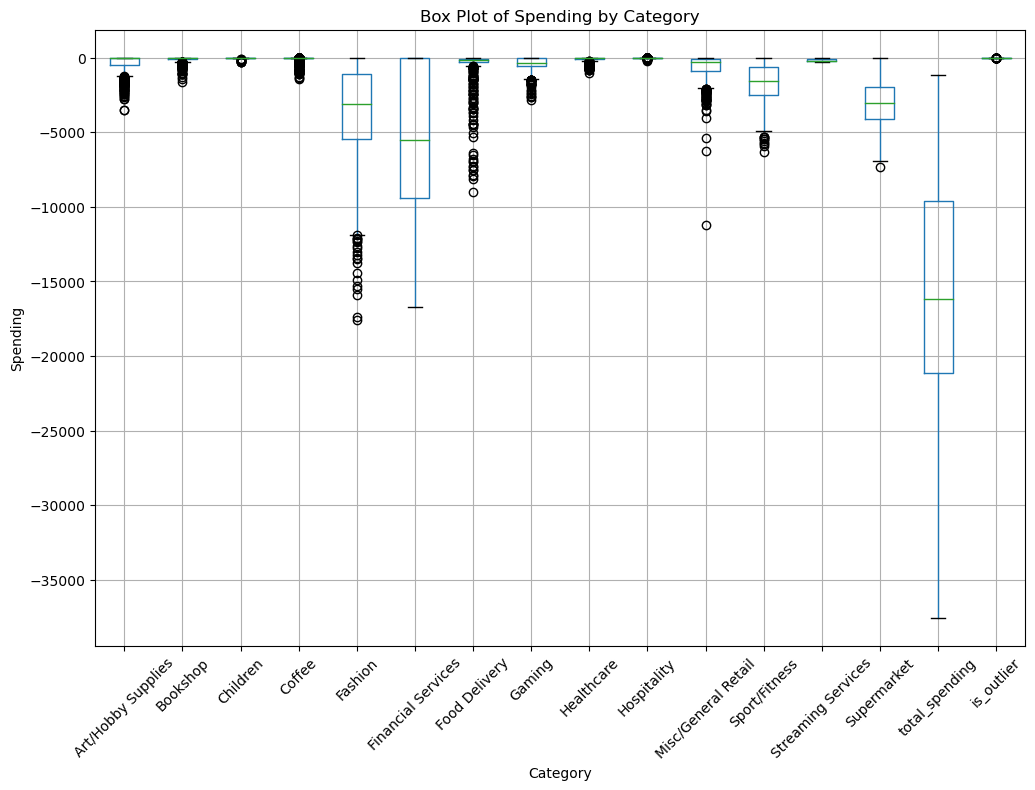

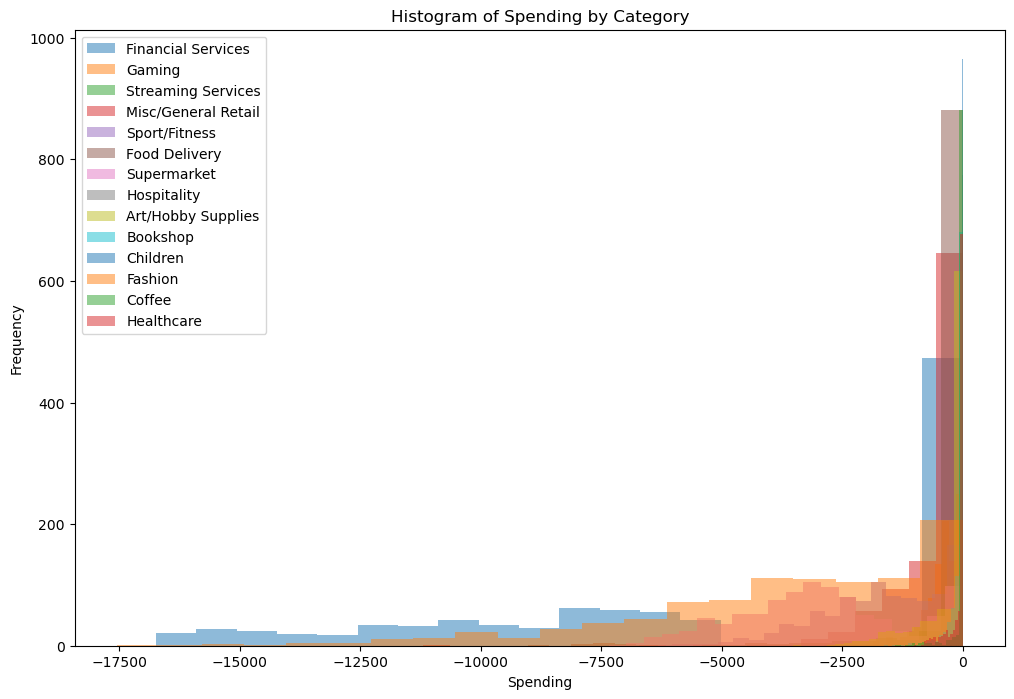

In [18]:
import matplotlib.pyplot as plt

# Box plot for each category
plt.figure(figsize=(12, 8))
pivoted_data.drop('Account No', axis=1).boxplot(rot=90)
plt.title('Box Plot of Spending by Category')
plt.ylabel('Spending')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

# Histogram of spending for each category
plt.figure(figsize=(12, 8))
for category in categories.keys():
    plt.hist(pivoted_data[category], bins=20, alpha=0.5, label=category)
plt.title('Histogram of Spending by Category')
plt.xlabel('Spending')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 23981870.0000 - val_loss: 24903890.0000
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 23832532.0000 - val_loss: 24903876.0000
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 25852900.0000 - val_loss: 24903856.0000
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24104786.0000 - val_loss: 24903842.0000
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24174274.0000 - val_loss: 24903840.0000
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 24223734.0000 - val_loss: 24903824.0000
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24645704.0000 - val_loss: 24903814.0000
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24750732.0000 - val_loss: 24903796.0000
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24415204.0000 - val_loss: 24903794.0000
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 24375880.0000 - val_loss: 24903782.0000
Epoch 11/50
25/25

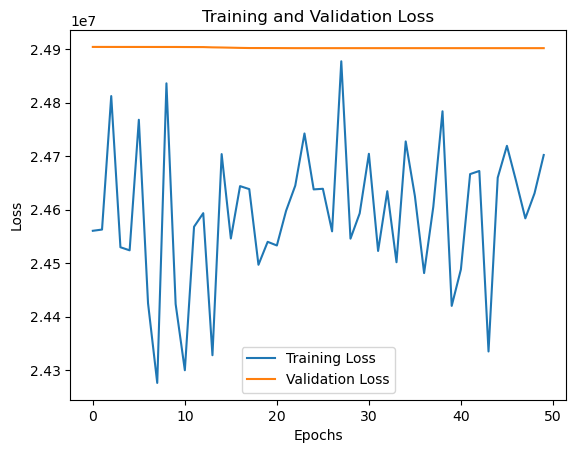

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Anomalies:
category   Account No  Art/Hobby Supplies  Bookshop  Children   Coffee  \
17        121113546.0                0.00    -39.94       0.0    -2.85   
40        138609932.0            -1437.70      0.00       0.0  -163.20   
47        143383029.0                0.00      0.00       0.0     0.00   
53        147341222.0             -171.40    -61.91       0.0     0.00   
82        173335108.0             -405.68      0.00       0.0     0.00   
94        188263947.0                0.00    -53.92       0.0     0.00   
99        191992682.0                0.00      0.00       0.0     0.00   
119       213096759.0                0.00    -57.91       0.0     0.00   
139       224524792.0                0.00    -34.95       0.0     0.00   
186       277562576.0             -936.44    -93.87       0.0 -1011.55   

category  Fashion  Financial Services  Food Delivery  Gaming  Healthcare  \
17       -2660.08                 0.0         -65.55 -276.79

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
import matplotlib.pyplot as plt

# Prepare data
X = pivoted_data.drop('Account No', axis=1).values
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Define autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 10  # Adjust the encoding dimension as needed
input_layer = tf.keras.Input(shape=(input_dim,))
encoder = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoder = layers.Dense(input_dim, activation='sigmoid')(encoder)
autoencoder = tf.keras.Model(input_layer, decoder)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Use the trained autoencoder to reconstruct the test data
reconstructed_data = autoencoder.predict(X_test)

# Calculate reconstruction errors
mse = np.mean(np.power(X_test - reconstructed_data, 2), axis=1)

# Define threshold for anomaly detection (e.g., 95th percentile of reconstruction errors)
threshold = np.percentile(mse, 95)

# Identify anomalies
anomalies = pivoted_data.iloc[np.where(mse > threshold)]
print("Anomalies:")
print(anomalies)


Summary Statistics:
count    1000.000000
mean       50.386641
std        19.584319
min       -14.825347
50%        50.506012
95%        83.539451
max       127.054630
dtype: float64
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2840.0552 - val_loss: 2734.5215
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2841.1064 - val_loss: 2729.7175
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2963.6516 - val_loss: 2729.0349
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2734.2930 - val_loss: 2728.7200
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2845.8921 - val_loss: 2728.5208
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2830.7795 - val_loss: 2728.3762
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2874.6343 - val_loss: 2728.2676
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2781.9058 - val_loss: 2728.1831
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2892.8625 - val_loss: 2728.1165
Epoch 1

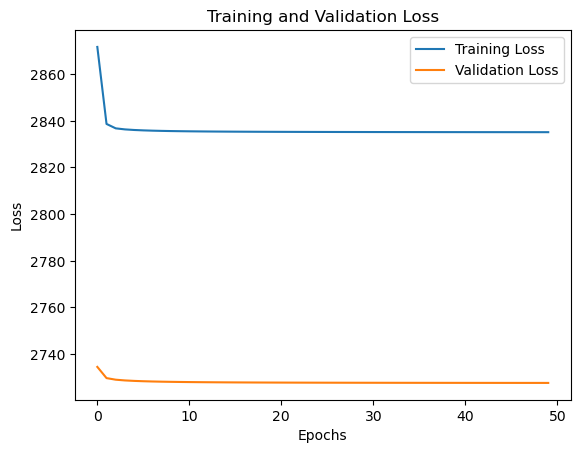

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Anomalies:
        Amount  Reconstruction Error
0    60.867204           3584.082468
1    69.653820           4713.347030
2    13.182515            149.518746
3    38.526760           1408.278866
4    27.507158            702.767876
..         ...                   ...
195  52.405913           2642.569606
196  51.516091           2551.877526
197  60.300954           3516.603523
198  27.490219            701.870533
199  51.835216           2584.221083

[197 rows x 2 columns]


In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
import matplotlib.pyplot as plt

# Generate synthetic transaction data
np.random.seed(42)  # For reproducibility
num_transactions = 1000
mean_transaction_amount = 50
std_transaction_amount = 20
transaction_amounts = np.random.normal(mean_transaction_amount, std_transaction_amount, num_transactions)

# Step 1: Analyze Synthetic Data
summary_statistics = pd.Series(transaction_amounts).describe(percentiles=[0.95])
print("Summary Statistics:")
print(summary_statistics)

# Step 2: Consider Transaction Patterns (not applicable for synthetic data)

# Step 3: Define Thresholds
threshold_percentile = summary_statistics['95%']

# Step 4: Adjust Thresholds (if necessary)

# Step 5: Apply Autoencoder Anomaly Detection
# Prepare data
X = transaction_amounts.reshape(-1, 1)  # Reshape for compatibility with autoencoder
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Define autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 10  # Adjust the encoding dimension as needed
input_layer = tf.keras.Input(shape=(input_dim,))
encoder = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoder = layers.Dense(input_dim, activation='sigmoid')(encoder)
autoencoder = tf.keras.Model(input_layer, decoder)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Use the trained autoencoder to reconstruct the test data
reconstructed_data = autoencoder.predict(X_test)

# Calculate reconstruction errors
mse = np.mean(np.power(X_test - reconstructed_data, 2), axis=1)

# Step 6: Adjust Thresholds and Identify Anomalies
# Let's use the threshold determined earlier
anomalies = pd.DataFrame({'Amount': X_test.flatten(), 'Reconstruction Error': mse})[mse > threshold_percentile]
print("Anomalies:")
print(anomalies)
